# Economic convergence inside monetary unions?

On September 13, 2017 the president of the European Commission, Jean Claude Junker, gave a speech in the European Parliament and advocated for the creation of a more perfect union of European states, a so called United States of Europe. Part of his vision was the further evolution of the Eurozone by the expansion to Eastern European states which have, up to this point, not adopted the Euro. 

Much has been written about optimal currency areas and much has been written about how the Euro is not an optimal currency area (e.g. because it doesn’t have transfer mechanisms such as Euro-wide unemployment insurance or a Euro-wide fiscal policy, as opposed to partially coordinating national states). 

As a citizen of an Eastern European country I am concerned not only with the lasting and proper functioning of a currency area (i.e. the avoidance of sovereign/currency crises), but also with the question of development. Currency areas are created to facilitate trade, capital flows and investment. But are they conducive to economic development of an underdeveloped economy? Will an economy like Romania’s grow faster inside the Euro than outside? More importantly, will an underdeveloped economy like Romania’s reach developed country status within a reasonable amount of time? 

These questions are about economic convergence: the convergence of standard of living between two countries or between two regions of the same country. 

My hypothesis is that currency unions do not guarantee economic convergence and may even hinder it through financial and economic mechanisms (e.g. debt dynamics, cross-border labor movements). In particular I suspect that inside of a currency union convergence happens only over very long periods of time (generations), if at all. 

What I want to present here is a case study of relative economic growth in the case of the US, as a currency area which has been in existence for over 200 years. In particular, I would like to investigate the extent to which there is convergence in the standard of living among the 50 US states over a period of 20 years from 1997 to 2016. We will focus on the question of whether there is convergence of income per capita between the poor states and the rich states. If a mature monetary union like the US does not necessarily lead to economic convergence between member states, it may be wise for European policy makers to think twice about the benefits of an expanded Euro. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pickle

In [2]:
sns.set(color_codes=True)

In [3]:
%matplotlib inline

# Data

My investigations are based on real GDP per capita (with real GDP coming from the BEA and population from the US Census Bureau - see Appendix for more details). An alternative would be personal income adjusted for inflation, or even better, personal income adjusted for cost of living. Unfortunately, cost of living data is not freely available so we will rely on the RGDP/capita. The BEA Real GDP data is in 2009 USD.

Since RGDP is a measure of goods produced in an economy, it can reflect things other than just standard of living. 


In [4]:
f = open('rgdp_per_capita', 'rb')
rgdp_per_capita = pickle.load(f)
f.close()

# Analysis

Our analysis will revolve around whether currency unions guarantee economic convergence. We will start by looking at initial and final states, and then move into measuring convergence over time. We will thus see that the US monetary union does not guarantee convergence and that there is no systematic "force" leading to convergence. We will end the analysis by a simple but striking result showing the long durations needed for convergence, unless state growth models and/or US economy set-up change in a radical way. 

Throughout the analysis we will aim to understand the extent to which there has been economic convergence (or convergence of income or standard of living) between poor states and rich states. 

Methodologically, it is important to keep in mind that we can with high confidence reject the convergence hypothesis by finding one example (e.g. our case study) where it doesn't happen. An example (e.g. our case study) that shows economic convergence does not represent a guarantee, but merely a possibility. More work of both theoretical and empirical types would be necessary to claim with a reasonable degree of confidence that a monetary union leads to economic convergence. 

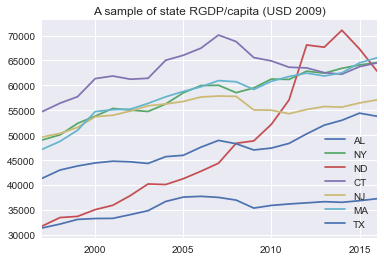

In [20]:
rgdp_per_capita[['AL','NY','ND','CT','NJ','MA','TX']].plot()
plt.title('A sample of state RGDP/capita (USD 2009)')
plt.show()

rpc = rgdp_per_capita.copy()
states = [x for x in rpc.columns if x!='US']
rpc = rpc[states]

# A first sign of possible convergence: distribution of income has shifted toward the right of the range

At an overview level we can plot the distribution of RGDP/capita in 1997 and in 2016 and we can immediately see that it has moved towards the right and that lower incomes are less prevalent than they used to be. This would lead us to believe that there has been some convergence if by that we mean growth in lower state incomes towards the middle of the range. 

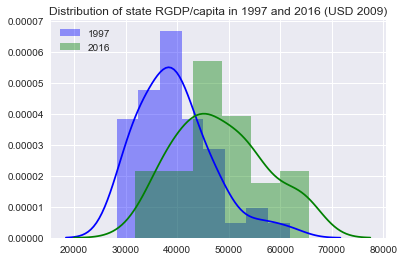

In [21]:
auxData1 = rpc.iloc[0,:].values
auxData2 = rpc.iloc[-1,:].values

sns.distplot(auxData1,  kde=True, rug=False, color='blue', label='1997')
sns.distplot(auxData2,  kde=True, rug=False, color='green', label='2016')
plt.legend(loc='upper left')
plt.title('Distribution of state RGDP/capita in 1997 and 2016 (USD 2009)')
plt.show()

# A second sign of possible convergence: a negative relationship between starting income and subsequent growth

When we plot the 20-year change in incomes versus the starting income we see a negative significant (95% level) relationship. We may perceive this as a sign pointing in the right direction, but a key question remains whether the subsequent growth is large enough to make up the gap between the poor and the rich states. 

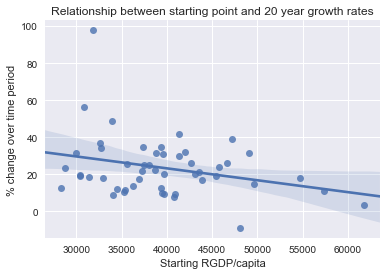

In [22]:
display_data0 = rpc.iloc[0,:].transpose()
aux_data = 100*(rpc.iloc[-1,:].divide(rpc.iloc[0,:])-1).transpose()
display_data0 = pd.concat([display_data0, aux_data], axis=1)
display_data0.columns = ['Starting','Change']

ax = sns.regplot(x="Starting", y="Change", data=display_data0)
plt.xlabel('Starting RGDP/capita')
plt.ylabel('% change over time period')
plt.title('Relationship between starting point and 20 year growth rates')
plt.show()

# Unfortunately, no systematic convergence of poor states to rich states

Even though states which start lower tend to grow faster, that growth is not enough to overcome the gap on a systemic basis. We can see this by looking at the quartiles of the distribution. Over the 20 year sample period the interquartile has not closed. This result is the same if we replace quartiles by deciles. 

This result goes to the heart of the hypothesis of economic convergence in monetary unions and rejects it flat out. Monetary unions, even as advanced as the USD monetary union (e.g. the Eurozone will not be a nation anytime soon) do not guarantee economic convergence. It is possible to go long periods of time (e.g. half a generation) without convergence of incomes on a systematic basis. 

In [23]:
# plot the 25th and 75th percentile over time and see whether there was convergence or divergence.
qq=0.25
p25 = rpc.quantile(q=qq, axis=1)
p50 = rpc.quantile(q=0.50, axis=1)
p75 = rpc.quantile(q=1-qq, axis=1)

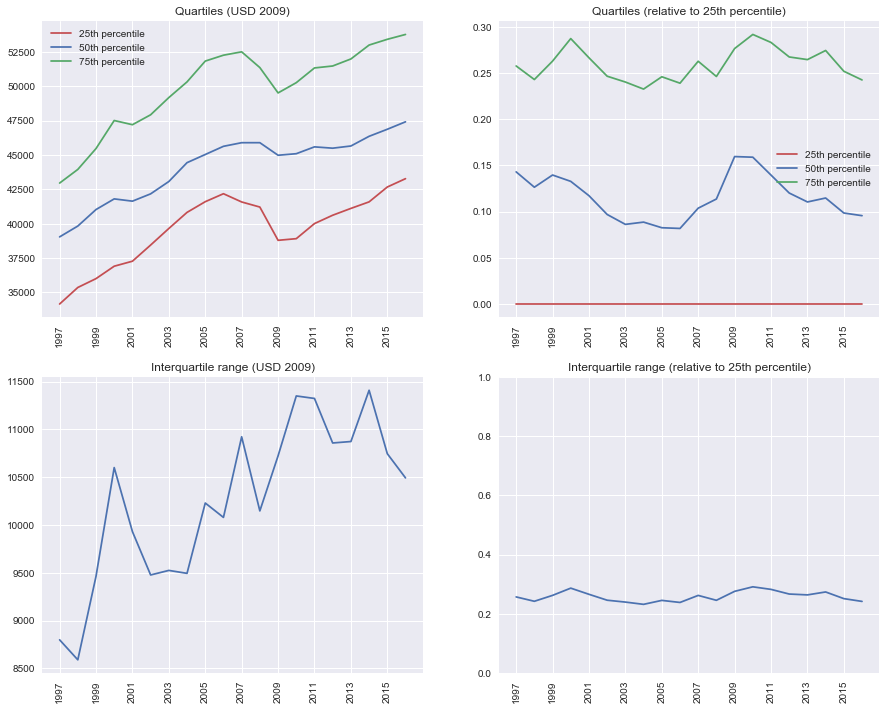

In [24]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.title('Quartiles (USD 2009)')
plt.plot(p25, color='r', label=str(int(100*qq))+'th percentile')
plt.plot(p50, color='b', label='50th percentile')
plt.plot(p75, color='g', label=str(int(100*(1-qq)))+'th percentile')
plt.legend(loc='best')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Quartiles (relative to {}th percentile)'.format(int(100*qq)))
plt.plot((p25-p25)/p25, color='r', label=str(int(100*qq))+'th percentile')
plt.plot((p50-p25)/p25, color='b', label='50th percentile')
plt.plot((p75-p25)/p25, color='g', label=str(int(100*(1-qq)))+'th percentile')
plt.legend(loc='best')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.plot(p75-p25, label='Interquartile range')
plt.title('Interquartile range (USD 2009)'.format(int(100*qq)))
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.plot((p75-p25)/p25, label='Interquartile range')
plt.title('Interquartile range (relative to {}th percentile)'.format(int(100*qq)))
plt.ylim([0,1])
plt.xticks(rotation=90)


plt.show()



# It is possible to stop being a poor state?

The rejection of the hypothesis can be discouraging, but it is actually possible, in spite of challenges associated with being in a monetary union, to overcome the "poor state" status and move into the top half of the distribution. 

We can see that historically during 1997 and 2016 four states (KS, OR, ND and SD) have moved from the bottom quartile to the top half of the distribution. ND has even moved to the very top quartile, on the back of what looks like a commodities boom through the development of shale oil extraction technologies. 

One should keep in mind a few caveats (see the "Further work" section below):
1. Our measure of income is RGDP/capita, which measures goods and services produced in the state. It is possible that not all of this reflects income to households as profits do not have to be fully transfered to households. 
2. These numbers are not adjusted for cost of living by state. 

In [25]:
# are there states that went from bottom to top? Or from bottom to middle?
y1 = p25.copy()
y2 = p50.copy()
y3 = p75.copy()
tmp_df = rpc.merge(pd.DataFrame(y1), how='inner',left_index=True, right_index=True)
tmp_df = tmp_df.merge(pd.DataFrame(y2),how='inner',left_index=True, right_index=True)
tmp_df = tmp_df.merge(pd.DataFrame(y3),how='inner',left_index=True, right_index=True)

In [26]:
upwardMoving = []
for state in states:
    # if state was at some point below y1
    below = tmp_df[state] <= tmp_df[0.25]
    above = tmp_df[state] >= tmp_df[0.5]
    for k in range(below.size) :
        if below[k]==True :
            if k+1<above.size:
                if any(above[k+1:-1]):
                    if state not in upwardMoving :
                        upwardMoving.append(state)

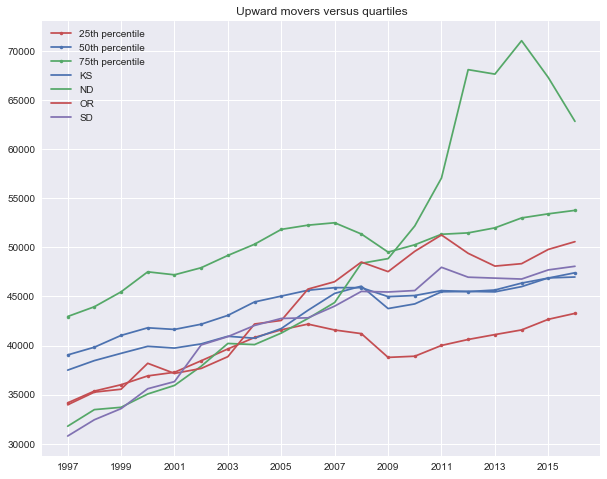

In [27]:
plt.figure(figsize=(10,8))
plt.plot(p25, color='r', marker='.', label=str(int(100*qq))+'th percentile')
plt.plot(p50, color='b', marker='.', label='50th percentile')
plt.plot(p75, color='g', marker='.', label=str(int(100*(1-qq)))+'th percentile')
for x in upwardMoving:
    plt.plot(rpc[x], label = x)
plt.legend(loc='upper left')
plt.title('Upward movers versus quartiles')
plt.show()
# We have 4 states which moved from the bottom of the distribution to the middle or top of the distribution. 

# "What's my prognosis?"

Given this state of affairs it would be interesting to estimate the length of time it would take for a given state to reach the level of income of the top states. 

This can be easily computed by assuming a simple Brownian Motion model and assuming that the statistical properties relative to benchmark remain the same going forward. To simplify the analysis we will consider the benchmark to be the average level of income of the states which were for the full-time period of our sample in the top quartile (i.e. states that we would always have considered rich). 

We first identify the states which stayed in the top quartile of the distribution. We then compute the mean and standard deviation of the relative growth rates (i.e. relative to the top states) for all other states. We conclude by computing the time (years) needed for a particular state to reach the top with a probability larger than 50%. 

The analysis reveals a few interesting facts:
1. the top states are: AK, CT, DE, MA, NJ, NY, WY
2. Unless something big changes, the vast majority of the states will not reach the top with probability larger than 50% in the next 100 years. 
3. Only three states (CA, OR & SD) will reach top level in the next 20 years with probability 50%.

In [28]:
# for the purposes of this analysis top states are the ones who stayed in the 25% for the last 20 years
top_states = []
for state in states:
    above = tmp_df[state] >= tmp_df[0.75]
    if all(above)==True :
        if state not in upwardMoving :
            top_states.append(state)

In [29]:
print('The top states are:')
for state in top_states:
    print(state)

The top states are:
AK
CT
DE
MA
NJ
NY
WY


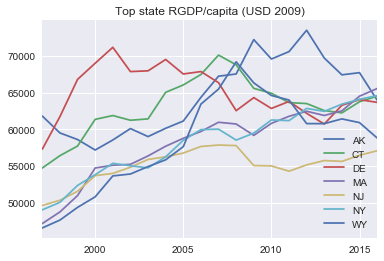

In [30]:
rpc[top_states].plot()
plt.title('Top state RGDP/capita (USD 2009)')
plt.show()

In [31]:
average_top = pd.DataFrame(rpc[top_states].mean(axis=1),columns=['average_top'])
aug_rpc = rpc.merge(average_top, how='inner',left_index=True, right_index=True)

aug_rpc_log = aug_rpc.apply(np.log)

# compute average and std yoy relative growth rates for each state which is not in the rich group
changes_log = aug_rpc_log-aug_rpc_log.shift(1).dropna(axis=0)
changes_log_relative = changes_log.sub(changes_log['average_top'], axis=0)
changes_log_relative_mean = changes_log_relative.dropna(axis=0).mean(axis=0)
changes_log_relative_std = changes_log_relative.dropna(axis=0).std(axis=0)

other_states = [x for x in states if x not in top_states]

target_to_reach = 1/aug_rpc[other_states]
target_to_reach = target_to_reach.mul(aug_rpc.loc[:,'average_top'], axis=0)-1
target_to_reach = target_to_reach.iloc[-1,:]

# postulating a BM model with the same average and std, what is the probability that the non-rich group will reach rich levels within time horizon
# P(N(mu*t, std*sqrt(t))>current differential)
prob_catch_up = 0.50
ni = norm.ppf(1-prob_catch_up) # inverse of the norm CDF
# what is the time necessary to ensure that a state will catch up with that probability
times = np.nan*target_to_reach
for state in other_states:
    curr_diff = target_to_reach[state]
    mu = changes_log_relative_mean[state]
    sigma = changes_log_relative_std[state]
    # find t such that P(N(mu*t, sigma*sqrt(t))>=current differential)=prob_catch_up   
    delta = ni**2 * sigma**2 + 4*mu*curr_diff
    if delta >= 0:
        st1 = (-ni*sigma - np.sqrt(delta))/(2*mu)
        st2 = (-ni*sigma + np.sqrt(delta))/(2*mu)
        ma = max(st1, st2)
        mi = min(st1, st2)
        if mi>=0:
            times[state] = mi**2
        elif ma>=0:
            times[state] = ma**2

In [32]:
average_top = pd.DataFrame(rpc[top_states].mean(axis=1),columns=['average_top'])
aug_rpc = rpc.merge(average_top, how='inner',left_index=True, right_index=True)

aug_rpc_log = aug_rpc.apply(np.log)

# compute average and std yoy relative growth rates for each state which is not in the rich group
changes_log = aug_rpc_log-aug_rpc_log.shift(1).dropna(axis=0)
changes_log_relative = changes_log.sub(changes_log['average_top'], axis=0)
changes_log_relative_mean = changes_log_relative.dropna(axis=0).mean(axis=0)
changes_log_relative_std = changes_log_relative.dropna(axis=0).std(axis=0)

other_states = [x for x in states if x not in top_states]

target_to_reach = 1/aug_rpc[other_states]
target_to_reach = target_to_reach.mul(aug_rpc.loc[:,'average_top'], axis=0)-1
target_to_reach = target_to_reach.iloc[-1,:]

# postulating a BM model with the same average and std, what is the probability that the non-rich group will reach rich levels within time horizon
# P(N(mu*t, std*sqrt(t))>current differential)
prob_catch_up = 0.50
ni = norm.ppf(1-prob_catch_up) # inverse of the norm CDF
# what is the time necessary to ensure that a state will catch up with that probability
times = np.nan*target_to_reach
for state in other_states:
    curr_diff = target_to_reach[state]
    mu = changes_log_relative_mean[state]
    sigma = changes_log_relative_std[state]
    # find t such that P(N(mu*t, sigma*sqrt(t))>=current differential)=prob_catch_up   
    delta = ni**2 * sigma**2 + 4*mu*curr_diff
    if delta >= 0:
        st1 = (-ni*sigma - np.sqrt(delta))/(2*mu)
        st2 = (-ni*sigma + np.sqrt(delta))/(2*mu)
        ma = max(st1, st2)
        mi = min(st1, st2)
        if mi>=0:
            times[state] = mi**2
        elif ma>=0:
            times[state] = ma**2

display_data = pd.concat([100*target_to_reach, times], axis=1)
display_data.columns = ['Gap', 'Convergence Time']

# display_data['Convergence Time'].isnull() 
nIdx =  (display_data['Convergence Time'] >100) | (display_data['Convergence Time'].isnull()) 
display_data.loc[nIdx,'Convergence Time'] = 100

# display_data.drop(display_data[display_data['Gap'] < 0].index, inplace=True)
tIdx = display_data['Gap'] < 0
display_data.loc[tIdx,:] = 0

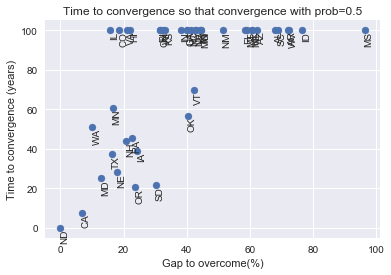

In [33]:
y = display_data['Convergence Time'].values
z = display_data['Gap'].values
n = display_data.index
 
fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.text(z[i],y[i]-4, txt, rotation=90)
plt.xlabel('Gap to overcome(%)')
plt.ylabel('Time to convergence (years)')
plt.title('Time to convergence so that convergence with prob='+str(prob_catch_up))
plt.show()

# Shortcomings and further work

This analysis has a number of shortcomings. First, it uses RGDP/capita and that doesn't necessarily reflect household income or state standard of living. Second, the time period, although reasonable, is not very long (e.g. 40-100 years). Third, it does not dwell on what could help economic convergence. The first of these shortcomings can be addressed by using personal income adjusted for cost of living. The second can be addressed by state and federal agencies collecting data for long enough periods for the explicit purpose of measuring economic convergence over long periods of time. Finally, the third one requires a theory about the inner workings of monetary unions. 

# Conclusions

This simple analysis rejects the hypothesis that monetary unions lead to convergence, even as economic convergence is possible in some isolated cases. Convergence seems to be a very long and drawn out process, unless something dramatic happens (e.g. a commodities boom or maybe a radical shift in legistlative/financial/labor conditions). 

Going back to the starting point of the analyis, it is fairly clear that a country like Romania should think very well about its development interest before joining a monetary union with considerably more developed countries (e.g. Germany's GDP per capita is twice that of Romania).

# Appendix

In [ ]:
# POPULATION data:
# original source: US Census Bureau
# https://www.census.gov/data/tables/time-series/demo/popest/pre-1980-state.html
# https://www.census.gov/data/tables/time-series/demo/popest/intercensal-1990-2000-state-and-county-totals.html
# https://www.census.gov/data/tables/time-series/demo/popest/intercensal-2000-2010-state.html
# https://www.census.gov/data/tables/2016/demo/popest/state-total.html

In [ ]:
# REAL GDP data:
# original source: Bureau Economic Analysis
# https://bea.gov/iTable/iTable.cfm?reqid=70&step=1&isuri=1&acrdn=2#reqid=70&step=1&isuri=1

In [ ]:
# from individual csv files I produced a binary file with the data I need
def ec_process_data():
    rgdp = pd.read_csv('rgdp.csv', header='infer')
    population = pd.read_csv('populationByState.csv', header='infer')

    rgdp.index = rgdp['Unnamed: 0'].values
    rgdp.drop(['Unnamed: 0'], axis=1, inplace=True)

    population.index = population['Unnamed: 0'].values
    population.drop(['Unnamed: 0'], axis=1, inplace=True)

    population = population.transpose()
    rgdp = rgdp.transpose()

    rgdp.drop(['New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain',
       'Far West'], axis=1, inplace=True)

    stateDict = {'United States': 'US', 'Alabama':'AL', 'Alaska':'AK','Arizona':'AZ', 'Arkansas':'AR','California':'CA',
            'Colorado':'CO','Connecticut':'CT','Delaware':'DE','District of Columbia':'DC', 'Florida':'FL',
            'Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS',
            'Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI', 'Minnesota':'MN',
            'Mississippi':'MS', 'Missouri': 'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV',
            'New Hampshire':'NH', 'New Jersey':'NJ', 'New Mexico':'NM', 'New York':'NY',
            'North Carolina':'NC', 'North Dakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR',
            'Pennsylvania':'PA', 'Rhode Island':'RI', 'South Carolina':'SC', 'South Dakota':'SD',
            'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA', 'Washington':'WA',
            'West Virginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY'}

    new_col_names = []
    for col_name in rgdp.columns.values:
        new_col_names.append(stateDict[col_name])
    
    rgdp.columns = new_col_names
    years = [y for y in rgdp.index if y in population.index]
    rgdp_tmp = rgdp.copy()
    population_tmp = population.loc[years, rgdp_tmp.columns].copy()
    rgdp_per_capita = 1e6*rgdp_tmp.divide(population_tmp)
    rgdp_per_capita.index = pd.to_datetime(rgdp_per_capita.index)
    rgdp_per_capita.drop(['DC'],axis=1, inplace=True)
    
    f = open('rgdp_per_capita', 'wb')
    pickle.dump(rgdp_per_capita, f)
    f.close()